In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.preprocessing import Binarizer
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split


%matplotlib inline

In [2]:
df= pd.read_csv('NY_bike_close.csv').dropna(axis=0)
print(df)

      Unnamed: 0  start_station_id  start_station_latitude  \
0           6521              72.0               40.767272   
2          42233              82.0               40.711174   
3          56934              83.0               40.683826   
4          78536             116.0               40.741776   
5          93334             119.0               40.696089   
6         111430             120.0               40.686768   
7         132640             127.0               40.731724   
8         150624             128.0               40.727103   
9         164708             143.0               40.692395   
10        184509             144.0               40.698399   
12        222733             150.0               40.720874   
13        240877             151.0               40.722104   
14        255196             157.0               40.690893   
15        276998             161.0               40.729170   
16        295193             164.0               40.753231   
17      

In [3]:
df.dtypes

Unnamed: 0                   int64
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
tripduration                 int64
tmp                         object
CensusTract                  int64
County_x                    object
Borough                     object
TotalPop                     int64
Men                          int64
Women                        int64
Hispanic                   float64
White                      float64
Black                      float64
Native                     float64
Asian                      float64
Citizen                      int64
Income                     float64
IncomeErr                  float64
IncomePerCap               float64
IncomePerCapErr            float64
Poverty                    float64
ChildPoverty               float64
Professional               float64
Service                    float64
Office                     float64
Construction               float64
Production          

In [4]:
#charts: correlation heatmap,histogram number of rides vs station, station vs borough, look at coursework and follow
# along with the coursework to do on here, feature engineering, linear regression, random forest

In [5]:
df['log_tripcount']=np.log(df.tripduration)

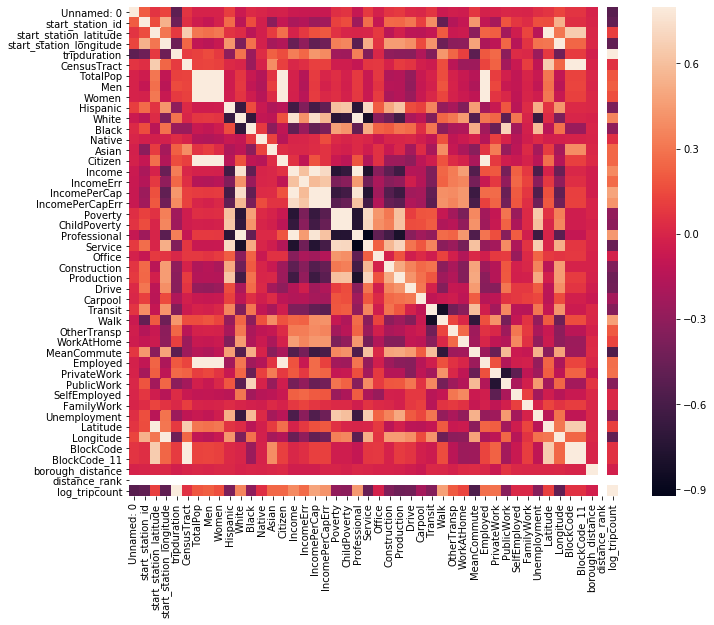

In [7]:
corrmat = df.corr()


f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


In [8]:
x=df[['borough_distance','TotalPop','Men','Women','Income','Poverty','start_station_id','Drive','Carpool','Walk','OtherTransp',
     'WorkAtHome','MeanCommute','Employed','Unemployment','PrivateWork','PublicWork','SelfEmployed','FamilyWork', 'tripduration']].dropna(axis=0)

y=df['tripduration'].dropna

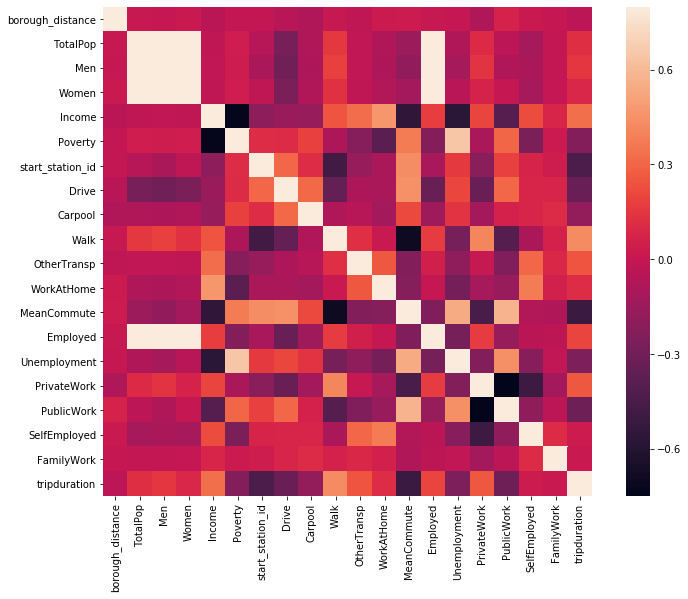

In [9]:
corrmat=x.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()

In [10]:
#combine carpool+OtherTransp, keep drive, walk, drop meancommute, do percentage of men from totalpop, 

Text(0, 0.5, 'Frequency')

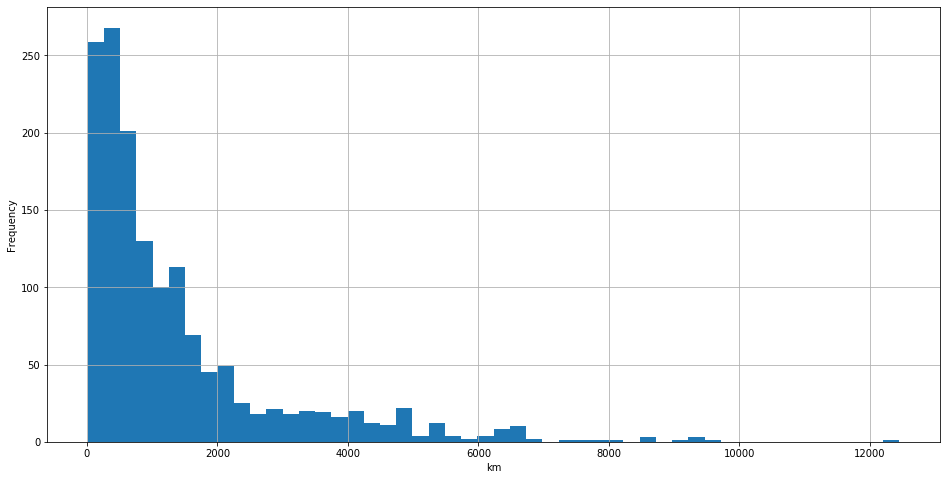

In [11]:
plt.figure(figsize=(16, 8))
df.tripduration.hist( bins=50)
plt.xlabel("km")
plt.ylabel('Frequency')

Text(0, 0.5, 'total trips')

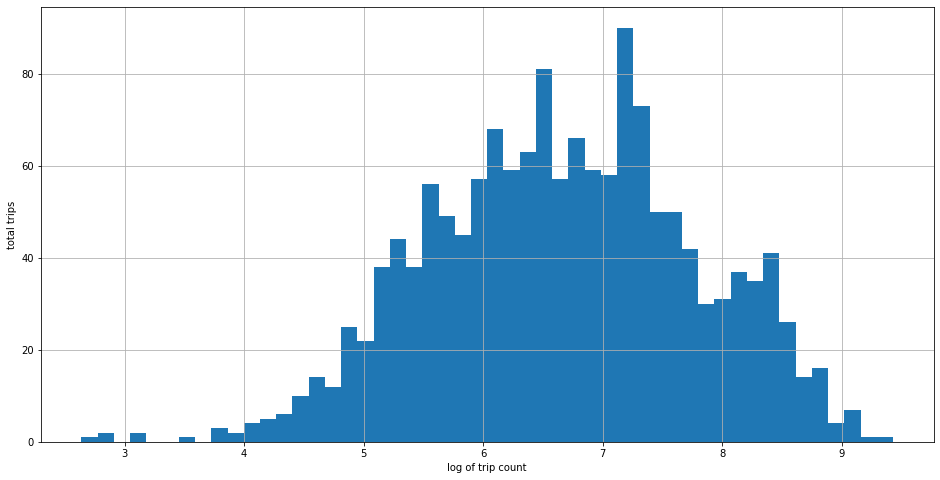

In [12]:
plt.figure(figsize=(16, 8))
df.log_tripcount.hist( bins=50)
plt.xlabel("log of trip count")
plt.ylabel('total trips')

Text(0.5, 0, 'Count of occurrences each bike was used')

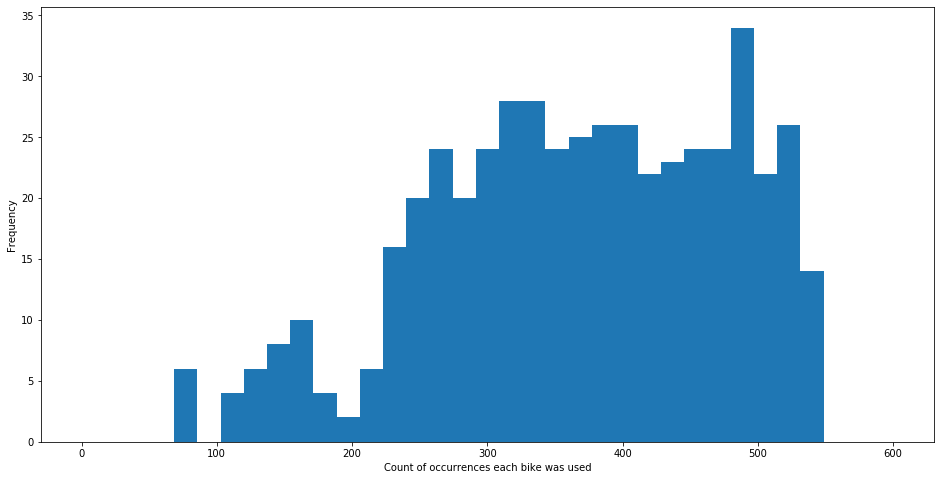

In [13]:
plt.figure(figsize=(16, 8))
df.start_station_id.plot(kind="hist", bins=35, range=(0,600))
plt.xlabel("Start Station ID")

In [14]:
#remove datapoint at 0, basic models to start- linear regressions, random forest, etc and then work on features to improve 
#prediction rate

In [15]:
#create powerpoint with shell for each slide to show what you will be predicting on that slide

In [16]:
df.columns

Index(['Unnamed: 0', 'start_station_id', 'start_station_latitude',
       'start_station_longitude', 'tripduration', 'tmp', 'CensusTract',
       'County_x', 'Borough', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White',
       'Black', 'Native', 'Asian', 'Citizen', 'Income', 'IncomeErr',
       'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment', 'Latitude', 'Longitude', 'BlockCode',
       'County_y', 'State', 'BlockCode_11', 'borough_distance',
       'distance_rank', 'log_tripcount'],
      dtype='object')

In [81]:
df_clean=df[['borough_distance','TotalPop','Men','Women','Income','Poverty','start_station_id','Drive','Carpool','Walk','OtherTransp',
     'WorkAtHome','Employed','Unemployment','PrivateWork','PublicWork','SelfEmployed','FamilyWork','Borough','County_x','Hispanic','Black',
            'Asian','White','Office','Construction','Production','Professional','Service','log_tripcount']].dropna (axis=1)

df_X=pd.concat([df_clean, pd.get_dummies(df_clean['Borough']),pd.get_dummies(df_clean['County_x'])],axis=1 )




In [82]:
X = pd.concat([df_clean, pd.get_dummies(df_clean['Borough']),pd.get_dummies(df_clean['County_x'])], axis=1)

Y = df['log_tripcount']

In [83]:
print (df_X)

      borough_distance  TotalPop   Men  Women    Income  Poverty  \
0             0.097058      6384  3286   3098   62290.0     18.6   
2             0.119646      6050  3671   2379   30629.0     20.6   
3             0.039960      2577  1102   1475   82071.0     11.2   
4             0.060052      3929  1534   2395   69303.0     18.5   
5             0.150738      1362   684    678   43000.0     18.7   
6             0.137077      3506  1711   1795   77039.0     19.0   
7             0.115864      2604  1447   1157  183750.0      7.4   
8             0.148779      4388  2315   2073   97929.0      4.7   
9             0.125334      4162  1967   2195  121083.0      7.7   
10            0.160995       382   214    168   92500.0     10.2   
12            0.178216      2019   872   1147   68750.0     17.4   
13            0.085161       984   519    465  139079.0      3.8   
14            0.110175      3318  1539   1779  138281.0      3.7   
15            0.048866      4747  2536   2211  1

In [84]:
Y.head()
X.head()

,borough_distance,TotalPop,Men,Women,Income,Poverty,start_station_id,Drive,Carpool,Walk,...,Production,Professional,Service,log_tripcount,Brooklyn,Manhattan,Queens,Kings,New York,Queens
0,0.097058,6384,3286,3098,62290.0,18.6,72.0,6.9,1.1,39.5,...,4.3,57.5,13.2,8.190632,0,1,0,0,1,0
2,0.119646,6050,3671,2379,30629.0,20.6,82.0,2.8,4.0,43.6,...,4.1,32.3,30.4,7.101676,0,1,0,0,1,0
3,0.039960,2577,1102,1475,82071.0,11.2,83.0,1.2,0.0,8.7,...,0.7,61.5,17.5,7.392032,1,0,0,1,0,0
4,0.060052,3929,1534,2395,69303.0,18.5,116.0,2.0,0.8,17.0,...,0.7,56.8,10.4,8.658866,0,1,0,0,1,0
5,0.150738,1362,684,678,43000.0,18.7,119.0,25.8,2.3,4.7,...,11.5,44.3,22.7,6.118097,1,0,0,1,0,0


In [86]:
y=df_X.log_tripcount
X= df_X.drop ('Borough', 1).drop('County_x' , 1)
(X_train, X_test, y_train, y_test)=train_test_split(X,y,test_size=0.25)
lr=LinearRegression()

In [88]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
lr.score(X_test,y_pred)
mean_squared_error(y_test,y_pred)

7.724255999443217e-27

R-squared regression: 1.0
R-squared PLSR: 0.9999794653638303


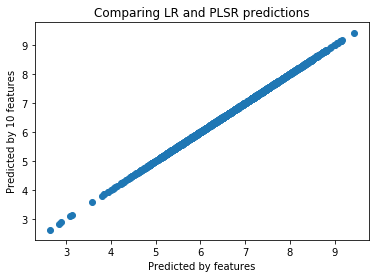

In [89]:
from sklearn.cross_decomposition import PLSRegression

regr = linear_model.LinearRegression()
regr.fit(X, y)

Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))


pls1 = PLSRegression(n_components=10)


pls1.fit(X, y)


Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))


plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by features')
plt.ylabel('Predicted by 10 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression



In [91]:
regr1 = linear_model.LinearRegression()
Y_train = df_X['log_tripcount']
X_train = df_X.drop ('Borough', 1).drop('County_x' , 1)

regr1.fit(X_train, Y_train)
print('\nR-squared simple model:')
print(regr1.score(X_train, Y_train))


R-squared simple model:
1.0


In [92]:
df_X.head()

,borough_distance,TotalPop,Men,Women,Income,Poverty,start_station_id,Drive,Carpool,Walk,...,Production,Professional,Service,log_tripcount,Brooklyn,Manhattan,Queens,Kings,New York,Queens
0,0.097058,6384,3286,3098,62290.0,18.6,72.0,6.9,1.1,39.5,...,4.3,57.5,13.2,8.190632,0,1,0,0,1,0
2,0.119646,6050,3671,2379,30629.0,20.6,82.0,2.8,4.0,43.6,...,4.1,32.3,30.4,7.101676,0,1,0,0,1,0
3,0.039960,2577,1102,1475,82071.0,11.2,83.0,1.2,0.0,8.7,...,0.7,61.5,17.5,7.392032,1,0,0,1,0,0
4,0.060052,3929,1534,2395,69303.0,18.5,116.0,2.0,0.8,17.0,...,0.7,56.8,10.4,8.658866,0,1,0,0,1,0
5,0.150738,1362,684,678,43000.0,18.7,119.0,25.8,2.3,4.7,...,11.5,44.3,22.7,6.118097,1,0,0,1,0,0


In [93]:
df_X.columns

Index(['borough_distance', 'TotalPop', 'Men', 'Women', 'Income', 'Poverty',
       'start_station_id', 'Drive', 'Carpool', 'Walk', 'OtherTransp',
       'WorkAtHome', 'Employed', 'Unemployment', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Borough', 'County_x', 'Hispanic',
       'Black', 'Asian', 'White', 'Office', 'Construction', 'Production',
       'Professional', 'Service', 'log_tripcount', 'Brooklyn', 'Manhattan',
       'Queens', 'Kings', 'New York', 'Queens'],
      dtype='object')

In [95]:
regr = ensemble.RandomForestRegressor()
X = df_X.drop ('Borough', 1).drop('County_x' , 1)
Y = df_X['log_tripcount']
regr.fit(X, Y)

print(regr.feature_importances_)

[2.06534760e-04 1.81050690e-06 7.36622619e-05 7.27476867e-06
 6.19219119e-06 3.51170644e-05 1.39808155e-05 7.34160582e-06
 6.03609050e-05 5.85106097e-06 1.10141357e-06 5.89729255e-06
 3.49800961e-06 1.67109956e-05 9.73649531e-06 6.88655400e-06
 6.50654660e-06 3.89329552e-07 7.56644659e-05 1.89883827e-06
 3.42118579e-06 1.80552274e-05 3.54523368e-06 3.51876674e-06
 1.67923948e-06 3.45980337e-06 1.11095131e-05 9.99394330e-01
 1.95530777e-07 6.57835991e-08 2.59734580e-08 6.55586921e-06
 7.29089876e-08 7.54887976e-06]


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [96]:
y=df_X.log_tripcount
X_feat=df_X.drop ('Borough', 1).drop('County_x' , 1)

X_feat['male_usage']= X.Men / X.TotalPop *100
X_feat['shared_trans'] = X.Carpool + X.Walk + X.OtherTransp
X_feat['minority'] = X.Hispanic + X.Black + X.Asian
X_feat['corporate'] = X.Office +X.Construction + X.PublicWork + X.Production
(X_train, X_test, y_train, y_test)=train_test_split(X_feat,y,test_size=0.25)
lr=LinearRegression()


In [97]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
lr.score(X_test,y_pred)
mean_squared_error(y_test,y_pred)

2.2344558964266666e-27

R-squared regression: 1.0
R-squared PLSR: 0.9999794653638303


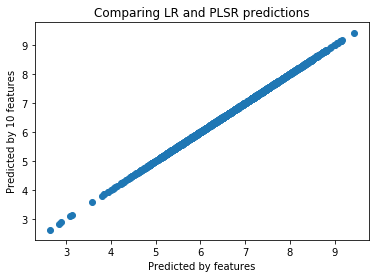

In [98]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))


pls1 = PLSRegression(n_components=10)


pls1.fit(X, y)


Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))


plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by features')
plt.ylabel('Predicted by 10 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

In [99]:
#random forest regression...whered it go?, gradient boosting, SVM,KNN maybe
#gradient boost, random forest regression grid search and fine tune

In [100]:
# use demographics to determine next best spot to add a station, in the .predict(use a census dataframe that doesn't have a
#station information is not included)this way you find a spot in boroughs that need one. 

In [101]:
y_gb = df_X['log_tripcount'] - 1
X_gb = df_X.loc[:,:]

# Make the categorical variable 'country' into dummies.
X_gb = df_X.drop ('Borough', 1).drop('County_x' , 1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X_gb[:offset], y_gb[:offset]

# And put 10% in the test set.
X_test, y_test = X_gb[offset:], y_gb[offset:]

In [102]:
params = {'n_estimators': 500,
          'max_depth': 2}


clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)


MSE: 0.0003


In [103]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
model = ensemble.GradientBoostingRegressor(**params)

model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [104]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(X_train, y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('R2 sq: ',model_score)
y_predicted = model.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

R2 sq:  0.9999509724050356
Mean squared error: 0.00
Test Variance score: 1.00


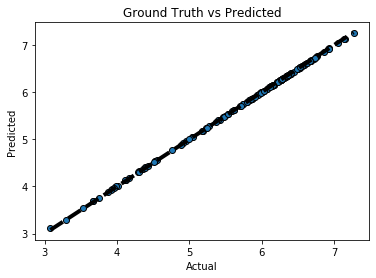

In [105]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

Text(0, 0.5, 'Deviance')

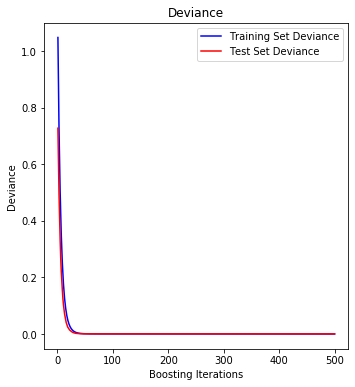

In [106]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

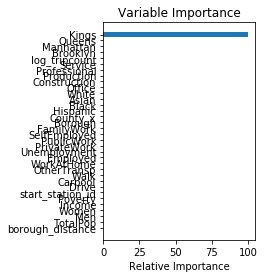

In [109]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos,df_X)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()